<a href="https://colab.research.google.com/github/IvanCCO/Analise-Algoritmo/blob/main/atividade_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Executar os algoritmos bubble sort e quick sort

Submeta o mesmo vetor para os dois algoritmos

Teste vetores com os seguintes tamanhos:
100
1000
10000
100000
1000000
10000000

Gerar um relarorio para apresentar:

o valor estimado de complexidade para cada algoritmo usado, n² e n.log(n), calcule isto

quantidade de memoria utilizada

tempo gasto em segundos ou minutos

quantidade de ciclos gastos

Apresntar estes valores em um relatório
Apresentar graficos comparativos para

complexidade estimada
memoria gasta
tempo gasto
ciclos gastos

discussão e conclusão



In [112]:
# Imports
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib as mpl
import random
from memory_profiler import memory_usage
import sys
import timeit
from functools import partial
sys.setrecursionlimit(999_999_999)


# Bubble Sort

Talvez a maneira mais intuitiva de se fazer uma ordenação, onde percorremos o array duas vezes, comparando o atual com o próximo e trocando caso o atual é maior que o próximo

In [19]:
def bubble_sort(arr):
    n = len(arr)
    # Percorre todos os elementos do array
    for i in range(n):
        # Últimos i elementos já estão no lugar certo, então não precisamos mais verificar eles
        for j in range(0, n - i - 1):
            # Percorre o array de 0 a n-i-1
            # Troca se o elemento atual for maior que o próximo
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

# Quick Sort

> Dividir para conquistar

Se escolhe um pivot e separa o array de um lado números maiores que o pivot e do outro um número menores que o pivot

In [20]:
def partition(arr, low, high):
    # Pega o último elemento como pivô
    pivot = arr[high]

    # Índice do menor elemento
    i = low - 1

    for j in range(low, high):
        # Se o elemento atual for menor ou igual ao pivô
        if arr[j] <= pivot:
            # Incrementa o índice do menor elemento
            i += 1
            # Troca arr[i] com arr[j]
            arr[i], arr[j] = arr[j], arr[i]

    # Troca arr[i+1] com arr[high] (o pivô)
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

In [21]:
def quick_sort(arr, low, high):
    if low < high:
        # Encontra o índice do pivô
        pi = partition(arr, low, high)
        # Divide e conquista
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

# Criando arrays não ordenados

In [125]:
arr = []
nx = []

for i in range(1,5):
    i = i * 5
    new_array = list(range(i))
    random.shuffle(new_array)
    arr.append(new_array)
    nx.append(len(new_array))
print(arr)

[[2, 4, 3, 0, 1], [8, 9, 5, 6, 1, 4, 0, 7, 2, 3], [0, 1, 2, 3, 6, 14, 4, 13, 5, 9, 11, 8, 10, 7, 12], [6, 11, 9, 1, 2, 19, 0, 17, 12, 3, 18, 16, 4, 10, 13, 7, 8, 14, 15, 5]]


# Ordenando array com quick sort

In [124]:
tempo_y_qs = []
memoria_y_qs = []

def aux(arr):
    memoria, resultado = memory_usage((quick_sort, (arr, 0, len(arr)-1), {}), max_usage=True, retval=True)

for i in arr:
    timer = timeit.Timer(partial(aux, i))
    tempo_execucao = timer.timeit(number=1)
    tempo_y_qs.append(tempo_execucao)

print(tempo_y_qs)
    

[3.6762752999784425, 3.6478025000251364, 3.7388210000062827, 3.5348536999954376]


# Ordenando array com bubble sort

In [126]:
tempo_y_bs = []
memoria_y_bs = []

def aux2(arr):
    memoria, resultado = memory_usage((bubble_sort, (arr,), {}), max_usage=True, retval=True)

for i in arr:
    timer = timeit.Timer(partial(aux2, i))
    tempo_execucao = timer.timeit(number=1)
    tempo_y_bs.append(tempo_execucao)

print(tempo_y_bs)

[3.6702581999998074, 3.6060296000214294, 3.6371838999912143, 3.5887955999933183]


# Preparando o gráfico para plotar os resultados

In [99]:
def plot_grafico_de_linha(x, y1, y2):
    plt.plot(x, y1, label='Bubble Sort O(n²)')  # Linha para o primeiro conjunto de dados
    plt.plot(x, y2, label='Quick Sort O(n log n)')  # Linha para o segundo conjunto de dados

    plt.xlabel('Tamanho do input (n)')
    plt.ylabel('Tempo gasto')
    plt.title('Gráfico de Linha Comparativo')
    plt.legend()
    plt.show()

In [ ]:
# Resultado

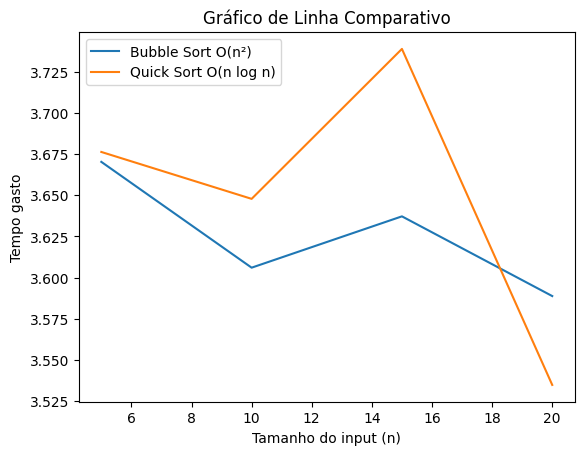

In [127]:
plot_grafico_de_linha(nx, tempo_y_bs, tempo_y_qs)